<a href="https://colab.research.google.com/github/himakshi2209/EDA-DA1-21BDS0051/blob/main/21BDS0051_EDA_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [1]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Auto.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
data.head(), data.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
 0  18.0          8         307.0         130    3504          12.0    70   
 1  15.0          8         350.0         165    3693          11.5    70   
 2  18.0          8         318.0         150    3436          11.0    70   
 3  16.0          8         304.0         150    3433          12.0    70   
 4  17.0          8         302.0         140    3449          10.5    70   
 
    origin                       name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  ,
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'year', 'origin', 'name'],
       dtype='object'))

The dataset contains the following columns:

Numerical Columns: mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin
Categorical Column: name (represents the car model name)

# Data Preprocessing

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent styling
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})  # Suppress warnings for max open figures

# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [8]:
import numpy as np
# Converting columns to appropriate types if needed, here 'horsepower' may contain non-numeric values.
# So we will coerce it to numeric and handle non-numeric values
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Fill any remaining NaNs in numeric columns only
# Get a list of numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns

# Fill NaNs in numeric columns with their respective medians
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

Missing Values: No missing values remain after conversions and filling.
Numerical Summary: Measures such as mean, standard deviation, and percentiles for each numerical column, indicating data range and distribution.
Categorical Summary: The name column has 301 unique car models, with "amc matador" appearing most frequently.

Data Deduplication

In [22]:
data = data.drop_duplicates()


In [23]:
data.shape

(392, 9)

b. Replacing Missing Values with Mean, Median, or Mode (Column-Wise

In [37]:
# Replacing missing values with mean, median, or mode for each column
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numerical column
        data[column].fillna(data[column].mean(), inplace=True)


<ipython-input-37-929de90cc46b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-37-929de90cc46b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [38]:
# Discretize numerical columns into 3 bins (Low, Medium, High)
for column in data.select_dtypes(include=np.number).columns:
    data[f'{column}_category'] = pd.cut(data[column], bins=3, labels=["Low", "Medium", "High"])


In [40]:
!pip install scikit-learn
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# Applying Iterative Imputer to approximate MLE for all numeric columns
numeric_data = data.select_dtypes(include=np.number)
imputer = IterativeImputer(max_iter=10, random_state=0)
data[numeric_data.columns] = imputer.fit_transform(numeric_data)

# Statistical Analysis

In [55]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:\n", data.describe())

# Summary statistics for categorical columns
for column in data.select_dtypes(include='object').columns:
    print(f"Value Counts for {column}:\n", data[column].value_counts())


Summary Statistics for Numerical Columns:
               mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  kmeans_cluster  \
count    392.000000  392.000000  392.000000      392.000000   
mean      15.541327   75.979592    1.576531        0.701531   
std        2.758864    3.683737    0.805518        0.831107   
min        8.000000   70.000000    1.000000        0.000

In [56]:
for column in data.select_dtypes(include=np.number).columns:
    print(f"Column: {column}")
    print("Mean:", data[column].mean())
    print("Median:", data[column].median())
    print("Mode:", data[column].mode()[0])
    print("Standard Deviation:", data[column].std())
    print("Variance:", data[column].var())
    print("Skewness:", data[column].skew())
    print("Kurtosis:", data[column].kurt())
    print("\n")


Column: mpg
Mean: 23.445918367346938
Median: 22.75
Mode: 13.0
Standard Deviation: 7.805007486571799
Variance: 60.918141865441825
Skewness: 0.45709232306041025
Kurtosis: -0.5159934946351457


Column: cylinders
Mean: 5.471938775510204
Median: 4.0
Mode: 4.0
Standard Deviation: 1.7057832474527843
Variance: 2.909696487290567
Skewness: 0.5081092402951901
Kurtosis: -1.3981986376833875


Column: displacement
Mean: 194.41198979591837
Median: 151.0
Mode: 97.0
Standard Deviation: 104.64400390890465
Variance: 10950.367554086852
Skewness: 0.7016690996581041
Kurtosis: -0.778316930213621


Column: horsepower
Mean: 104.46938775510205
Median: 93.5
Mode: 150.0
Standard Deviation: 38.49115993282855
Variance: 1481.5693929745862
Skewness: 1.0873262824048697
Kurtosis: 0.696946999742821


Column: weight
Mean: 2977.5841836734694
Median: 2803.5
Mode: 1985.0
Standard Deviation: 849.4025600429494
Variance: 721484.7090075163
Skewness: 0.5195856740558396
Kurtosis: -0.809259388327968


Column: acceleration
Mean: 15

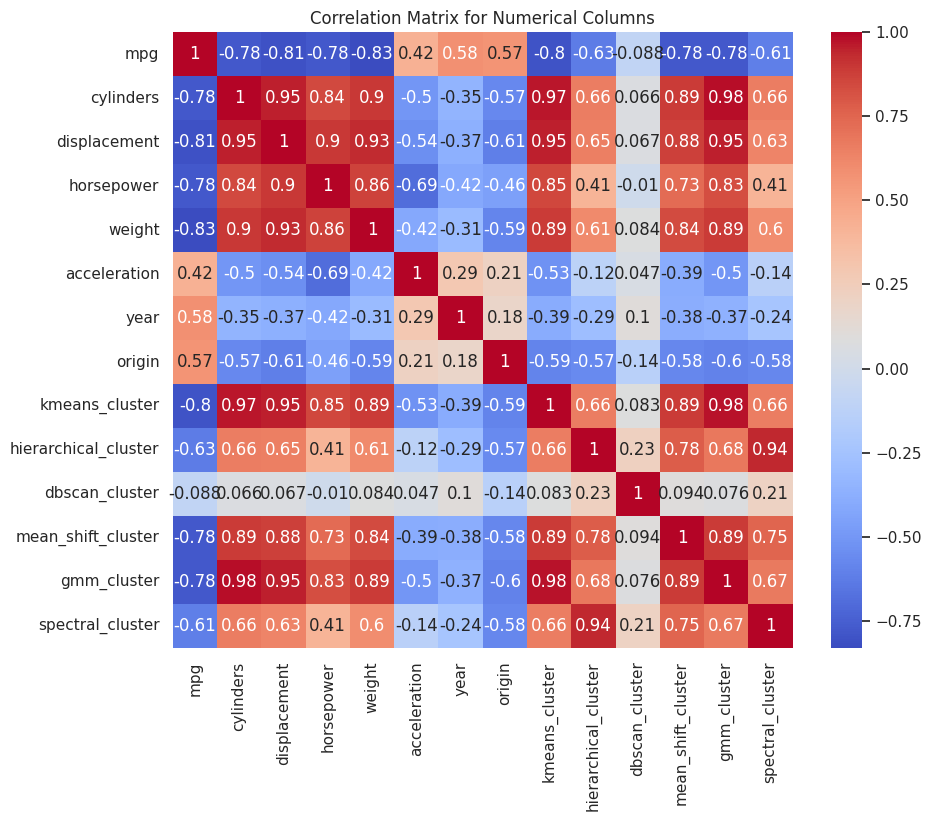

In [58]:
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

# Correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical data only

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

In [60]:
# Covariance matrix for all numerical columns
covariance_matrix = numerical_data.cov()
print("Covariance Matrix:\n", covariance_matrix)


Covariance Matrix:
                               mpg    cylinders  displacement    horsepower  \
mpg                     60.918142   -10.352928   -657.585207   -233.857926   
cylinders              -10.352928     2.909696    169.721949     55.348244   
displacement          -657.585207   169.721949  10950.367554   3614.033744   
horsepower            -233.857926    55.348244   3614.033744   1481.569393   
weight               -5517.440704  1300.424363  82929.100139  28265.620231   
acceleration             9.115514    -2.375052   -156.994435    -73.186967   
year                    16.691477    -2.171930   -142.572133    -59.036432   
origin                   3.553510    -0.781734    -51.800792    -14.112741   
kmeans_cluster          -5.173984     1.368841     82.638626     27.339945   
hierarchical_cluster    -3.761966     0.868743     52.416743     12.133723   
dbscan_cluster          -1.294569     0.211970     13.134646     -0.758182   
mean_shift_cluster      -2.982590     0.7442

In [62]:
# Contingency tables between pairs of categorical columns
cat_columns = data.select_dtypes(include='string').columns
for i, col1 in enumerate(cat_columns):
    for col2 in cat_columns[i+1:]:
        print(f"Contingency Table for {col1} and {col2}:\n", pd.crosstab(data[col1], data[col2]))


In [63]:
from scipy.stats import ttest_ind

# Pairwise t-test across all numerical columns
num_columns = data.select_dtypes(include=np.number).columns
for i, col1 in enumerate(num_columns):
    for col2 in num_columns[i+1:]:
        t_stat, p_val = ttest_ind(data[col1], data[col2], nan_policy='omit')
        print(f"T-test between {col1} and {col2}: t-stat={t_stat}, p-value={p_val}")


T-test between mpg and cylinders: t-stat=44.54328162206771, p-value=1.0009001784391416e-216
T-test between mpg and displacement: t-stat=-32.25774098294976, p-value=7.826366771513534e-146
T-test between mpg and horsepower: t-stat=-40.84538909257307, p-value=3.9295637036571437e-196
T-test between mpg and weight: t-stat=-68.85602571282897, p-value=0.0
T-test between mpg and acceleration: t-stat=18.905309286222884, p-value=6.131875502201747e-66
T-test between mpg and year: t-stat=-120.51399446418262, p-value=0.0
T-test between mpg and origin: t-stat=55.183044522798696, p-value=6.972659489158557e-272
T-test between mpg and kmeans_cluster: t-stat=57.37142316011739, p-value=1.772722559912241e-282
T-test between mpg and hierarchical_cluster: t-stat=57.65569771491592, p-value=7.772395021507693e-284
T-test between mpg and dbscan_cluster: t-stat=58.63947666448911, p-value=1.669446589654514e-288
T-test between mpg and mean_shift_cluster: t-stat=58.31745438825152, p-value=5.560609266919244e-287
T-t

In [64]:
from scipy.stats import f_oneway

# Run ANOVA for each numerical column against categories of each categorical column
for num_col in num_columns:
    for cat_col in cat_columns:
        groups = [data[num_col][data[cat_col] == category] for category in data[cat_col].unique()]
        f_stat, p_val = f_oneway(*groups)
        print(f"ANOVA for {num_col} by {cat_col}: F-statistic={f_stat}, p-value={p_val}")


In [65]:
from scipy.stats import chi2_contingency

# Chi-square test of independence for each pair of categorical columns
for i, col1 in enumerate(cat_columns):
    for col2 in cat_columns[i+1:]:
        contingency_table = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test between {col1} and {col2}: chi2={chi2}, p-value={p}")


In [66]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality for each numerical column
for column in num_columns:
    stat, p = shapiro(data[column].dropna())
    print(f"Shapiro-Wilk Test for {column}: W-statistic={stat}, p-value={p}")


Shapiro-Wilk Test for mpg: W-statistic=0.9671696219782999, p-value=1.0494407063380879e-07
Shapiro-Wilk Test for cylinders: W-statistic=0.7506596822226748, p-value=6.880241744029972e-24
Shapiro-Wilk Test for displacement: W-statistic=0.8818359417766902, p-value=8.983637114586926e-17
Shapiro-Wilk Test for horsepower: W-statistic=0.9040974881446464, p-value=5.0220692907916354e-15
Shapiro-Wilk Test for weight: W-statistic=0.9414660744821145, p-value=2.601685807651511e-11
Shapiro-Wilk Test for acceleration: W-statistic=0.9918671364554661, p-value=0.030528862000196957
Shapiro-Wilk Test for year: W-statistic=0.9469665948027586, p-value=1.2226170042045702e-10
Shapiro-Wilk Test for origin: W-statistic=0.6737641638584284, p-value=8.802044229203731e-27
Shapiro-Wilk Test for kmeans_cluster: W-statistic=0.7270388703518045, p-value=7.640017557501489e-25
Shapiro-Wilk Test for hierarchical_cluster: W-statistic=0.7189915439867889, p-value=3.7364369411421826e-25
Shapiro-Wilk Test for dbscan_cluster: W-s

In [67]:
from scipy.stats import pearsonr, spearmanr

# Pearson and Spearman correlation for each pair of numerical columns
for i, col1 in enumerate(num_columns):
    for col2 in num_columns[i+1:]:
        pearson_corr, pearson_p = pearsonr(data[col1], data[col2])
        spearman_corr, spearman_p = spearmanr(data[col1], data[col2])
        print(f"{col1} and {col2} - Pearson correlation: {pearson_corr}, p-value: {pearson_p}")
        print(f"{col1} and {col2} - Spearman correlation: {spearman_corr}, p-value: {spearman_p}\n")


mpg and cylinders - Pearson correlation: -0.7776175081260227, p-value: 1.3113836370984851e-80
mpg and cylinders - Spearman correlation: -0.8231746391245732, p-value: 6.649861159313127e-98

mpg and displacement - Pearson correlation: -0.8051269467104578, p-value: 1.6606418277978275e-90
mpg and displacement - Spearman correlation: -0.8552335882841172, p-value: 2.1957775993226176e-113

mpg and horsepower - Pearson correlation: -0.7784267838977761, p-value: 7.031989029403434e-81
mpg and horsepower - Spearman correlation: -0.8536164024453882, p-value: 1.619383245501938e-112

mpg and weight - Pearson correlation: -0.8322442148315753, p-value: 6.015296051435642e-102
mpg and weight - Spearman correlation: -0.8755851198739869, p-value: 2.662377938025222e-125

mpg and acceleration - Pearson correlation: 0.4233285369027872, p-value: 1.7785761248041466e-18
mpg and acceleration - Spearman correlation: 0.44153885845636487, p-value: 3.9036035663531793e-20

mpg and year - Pearson correlation: 0.580540

#Univariate Analysis

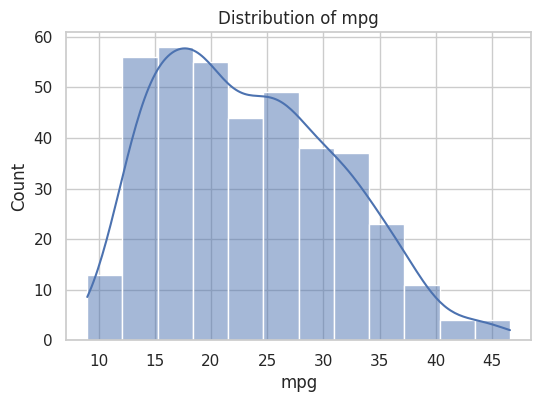

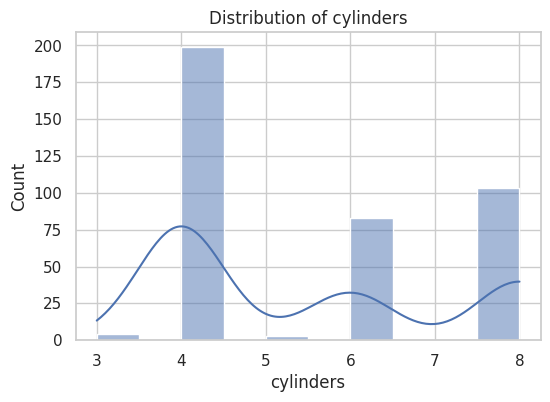

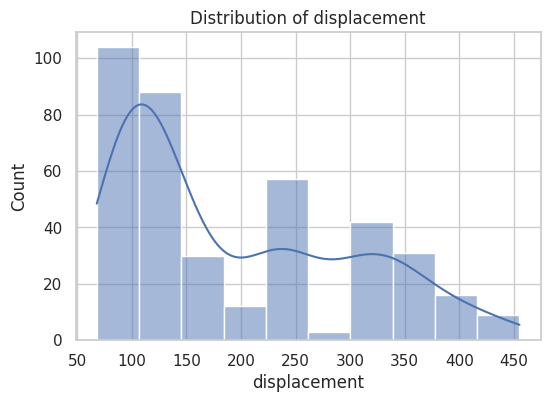

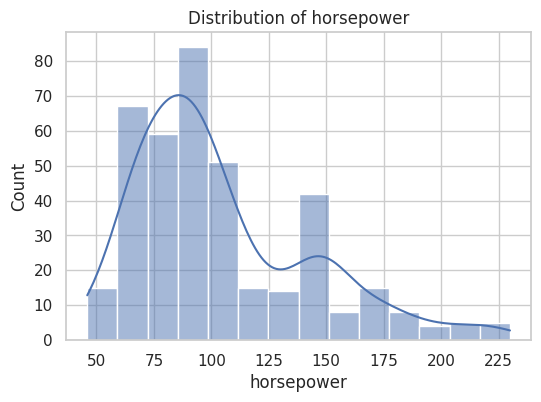

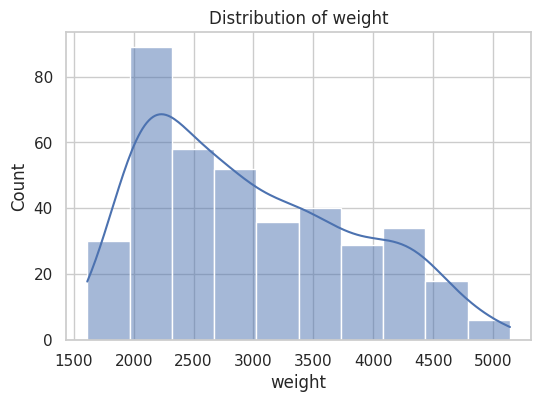

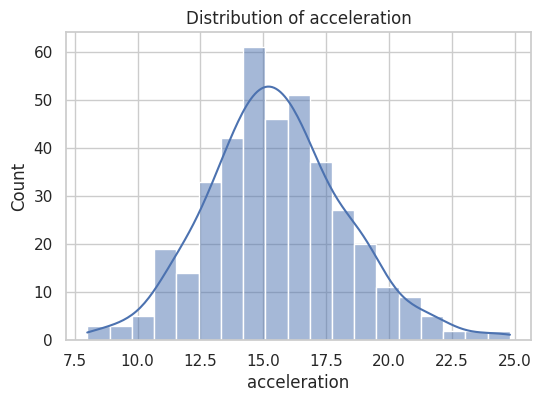

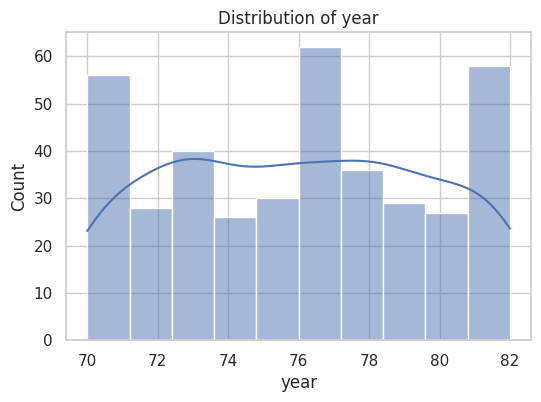

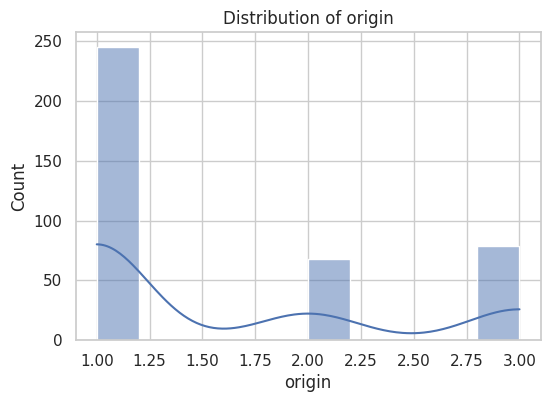

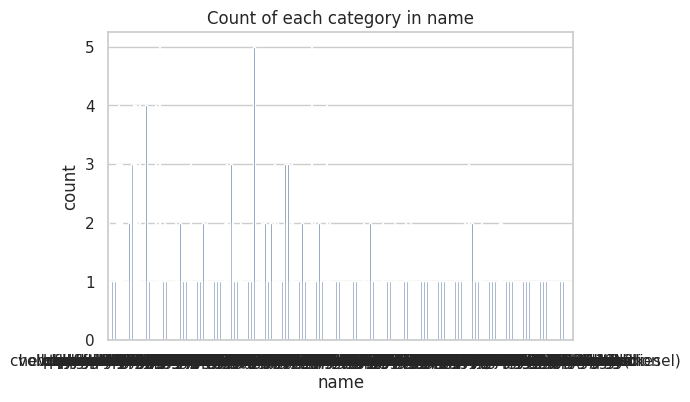

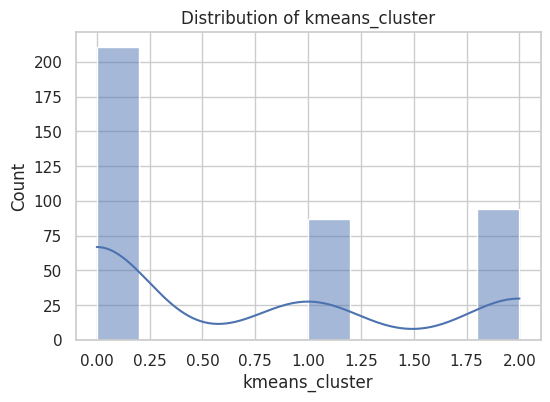

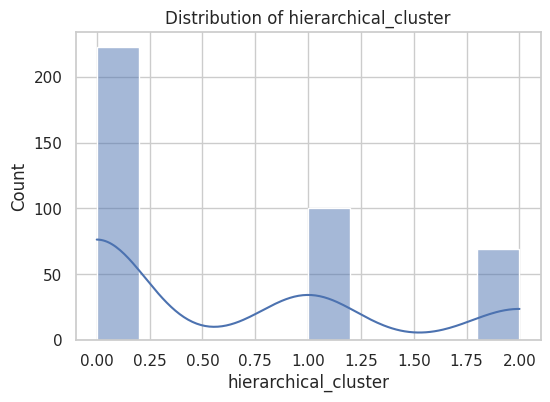

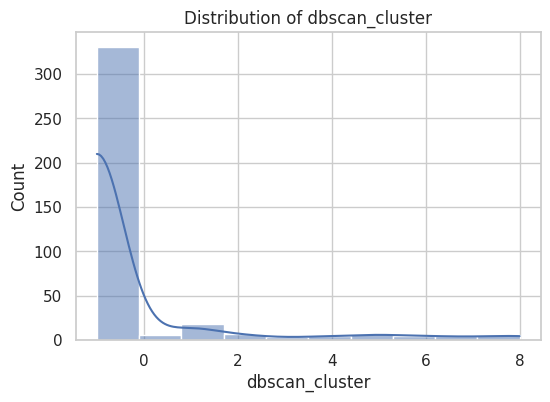

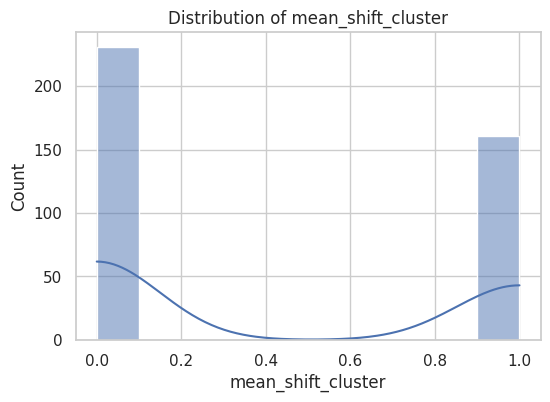

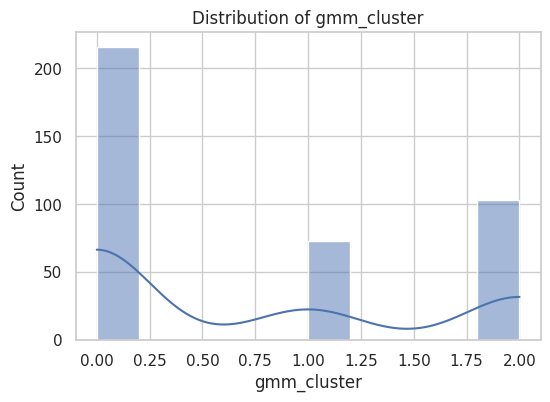

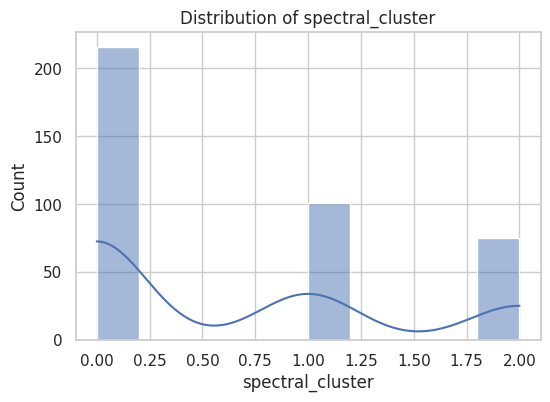

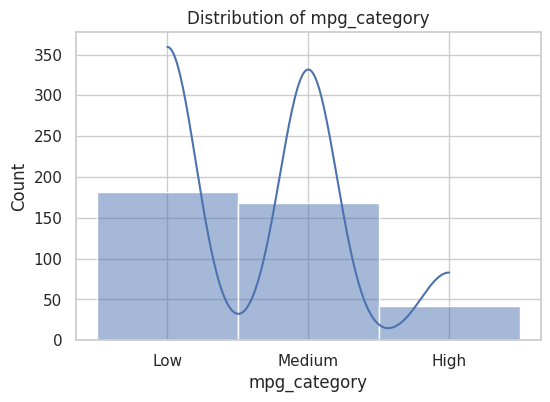

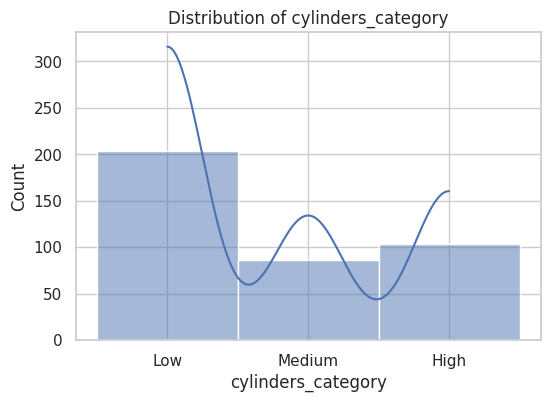

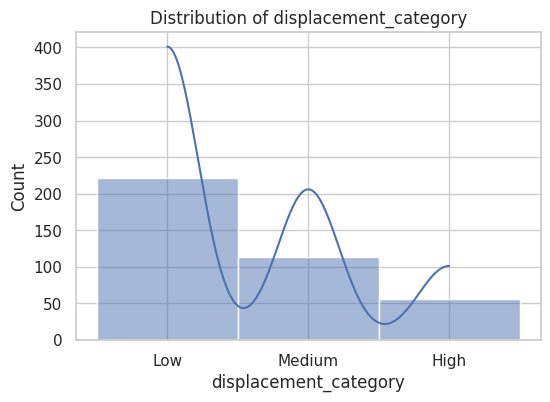

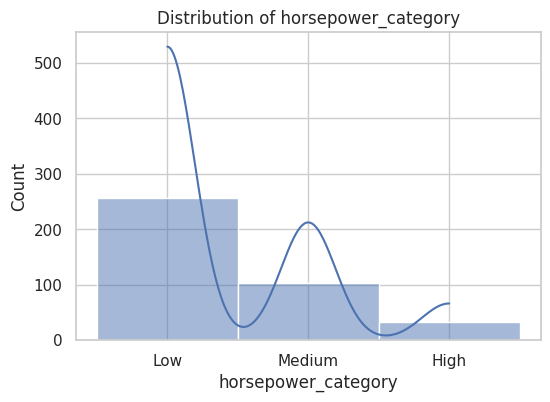

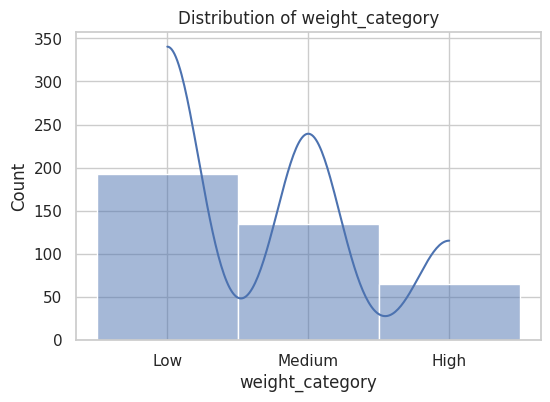

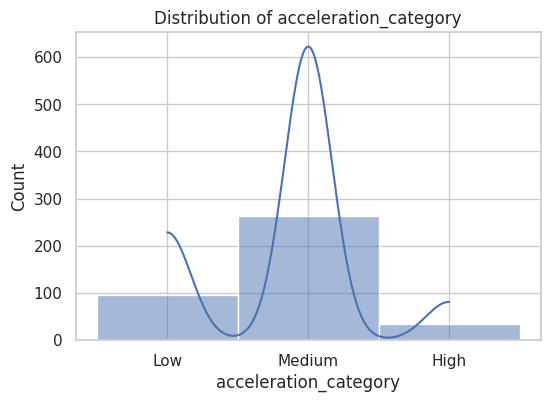

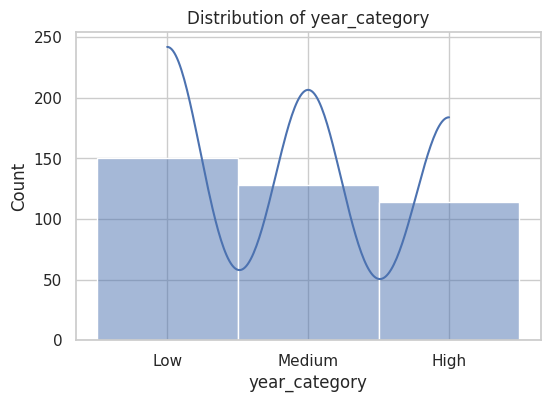

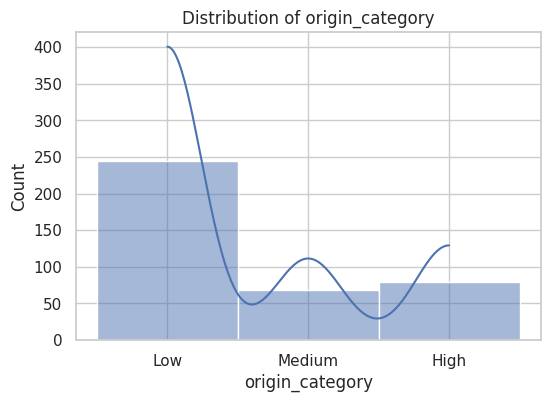

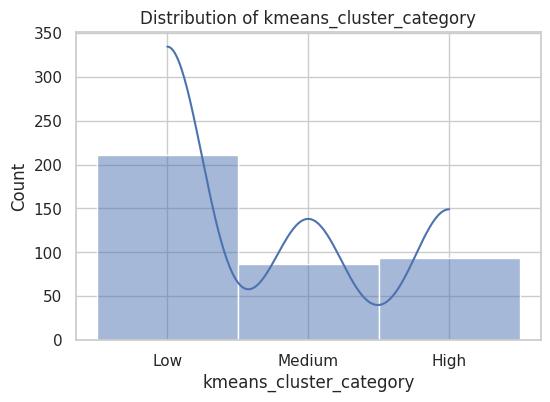

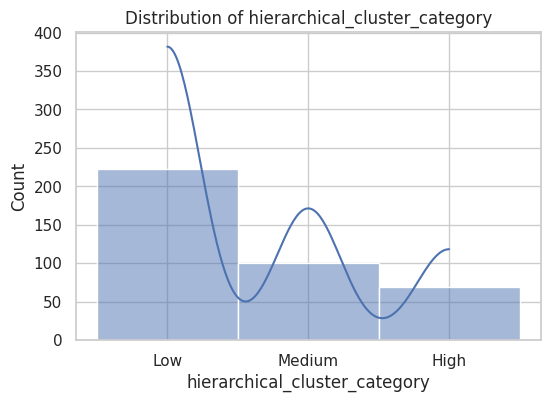

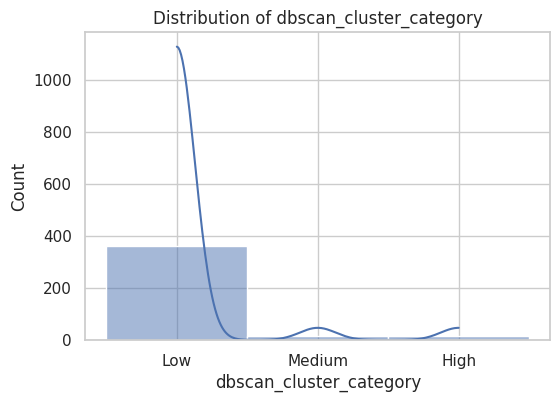

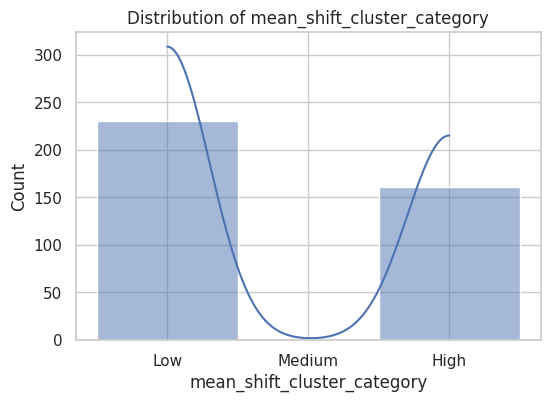

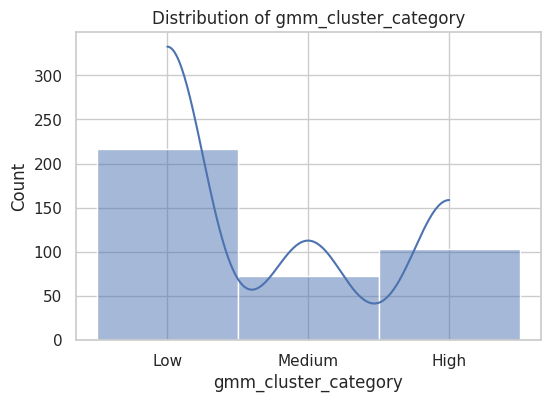

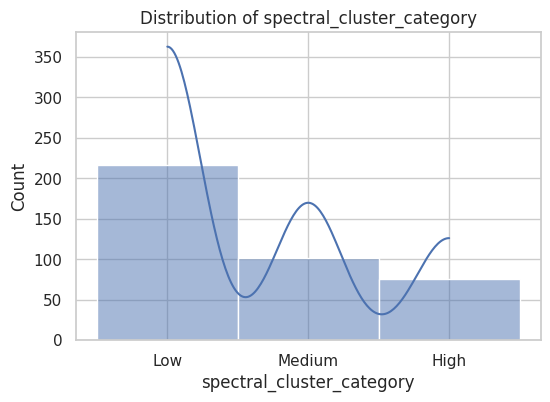

In [41]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    if data[column].dtype == 'object':
        sns.countplot(x=column, data=data)
        plt.title(f'Count of each category in {column}')
    else:
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
    plt.show()


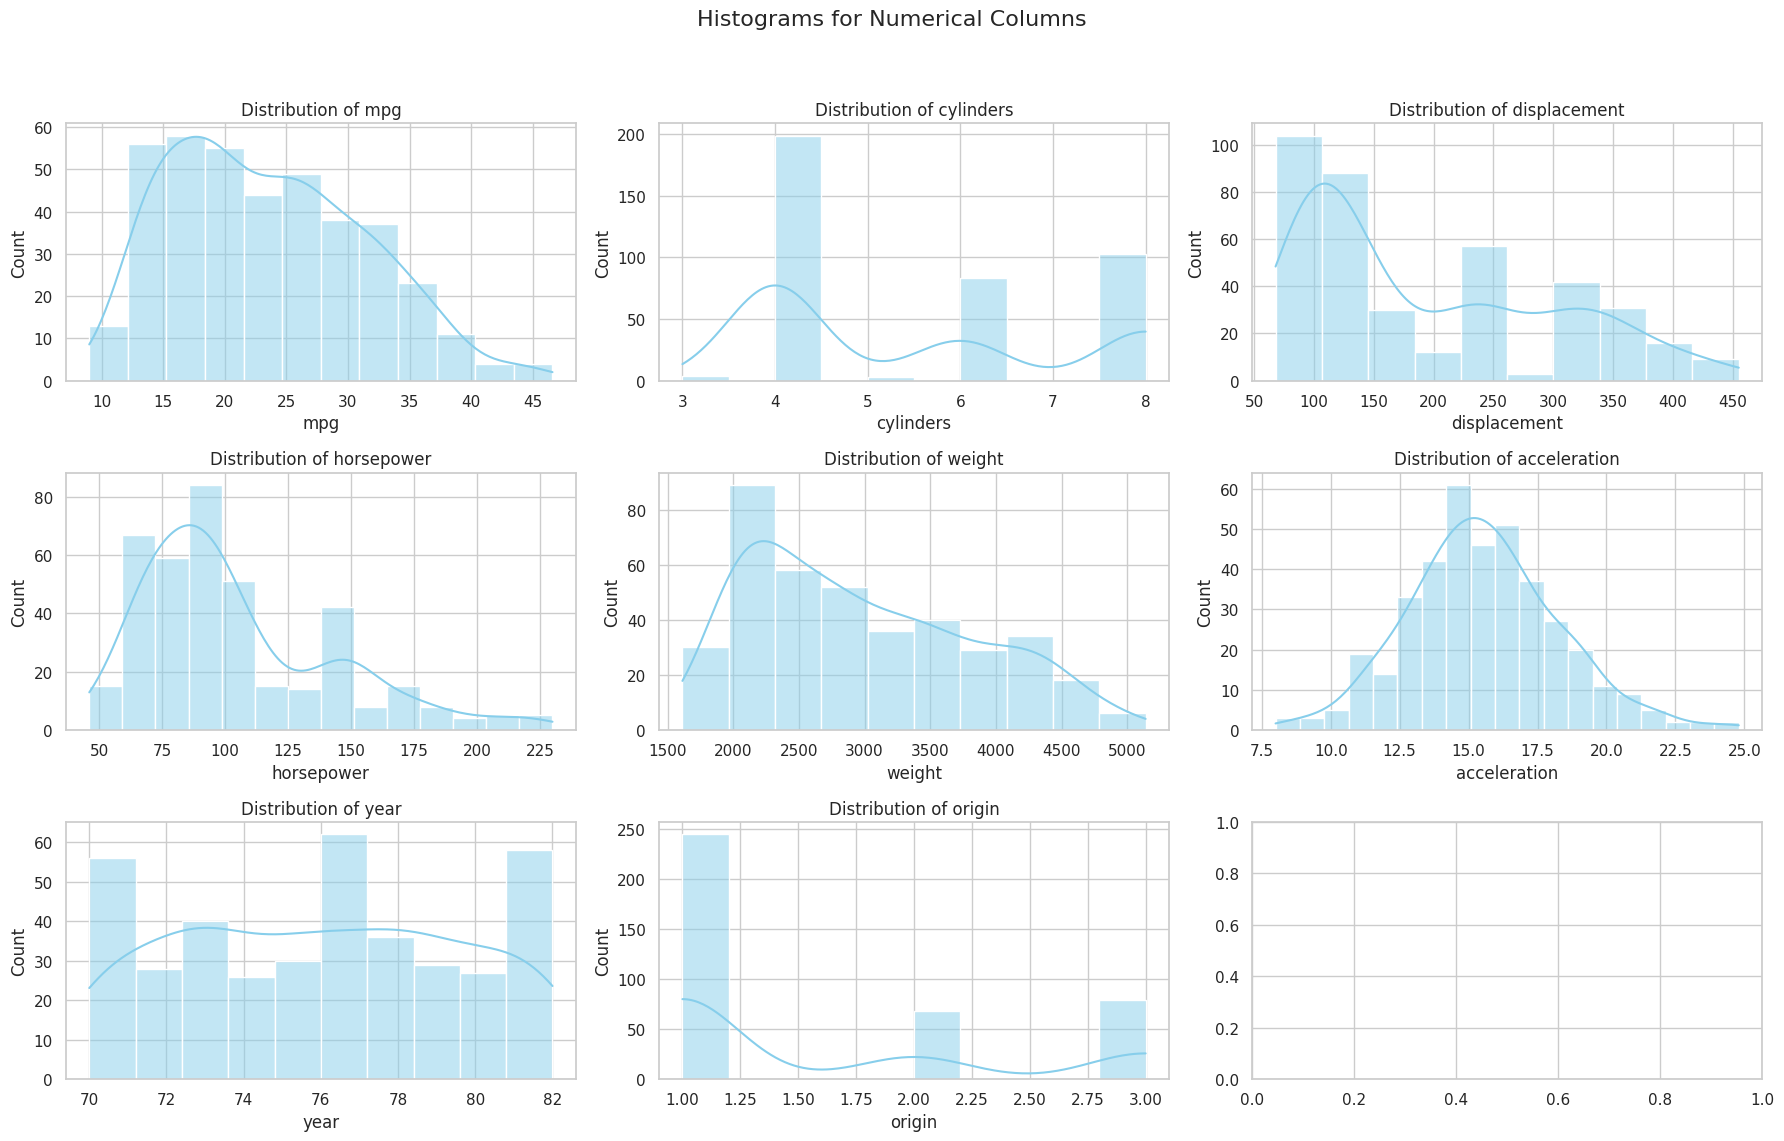

In [9]:
# Visualization: Histograms for numerical data distribution
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Histograms for Numerical Columns", fontsize=16)

numerical_columns = data.select_dtypes(include='number').columns
for col, subplot in zip(numerical_columns, ax.flatten()):
    sns.histplot(data[col], kde=True, ax=subplot, color='skyblue')
    subplot.set_title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


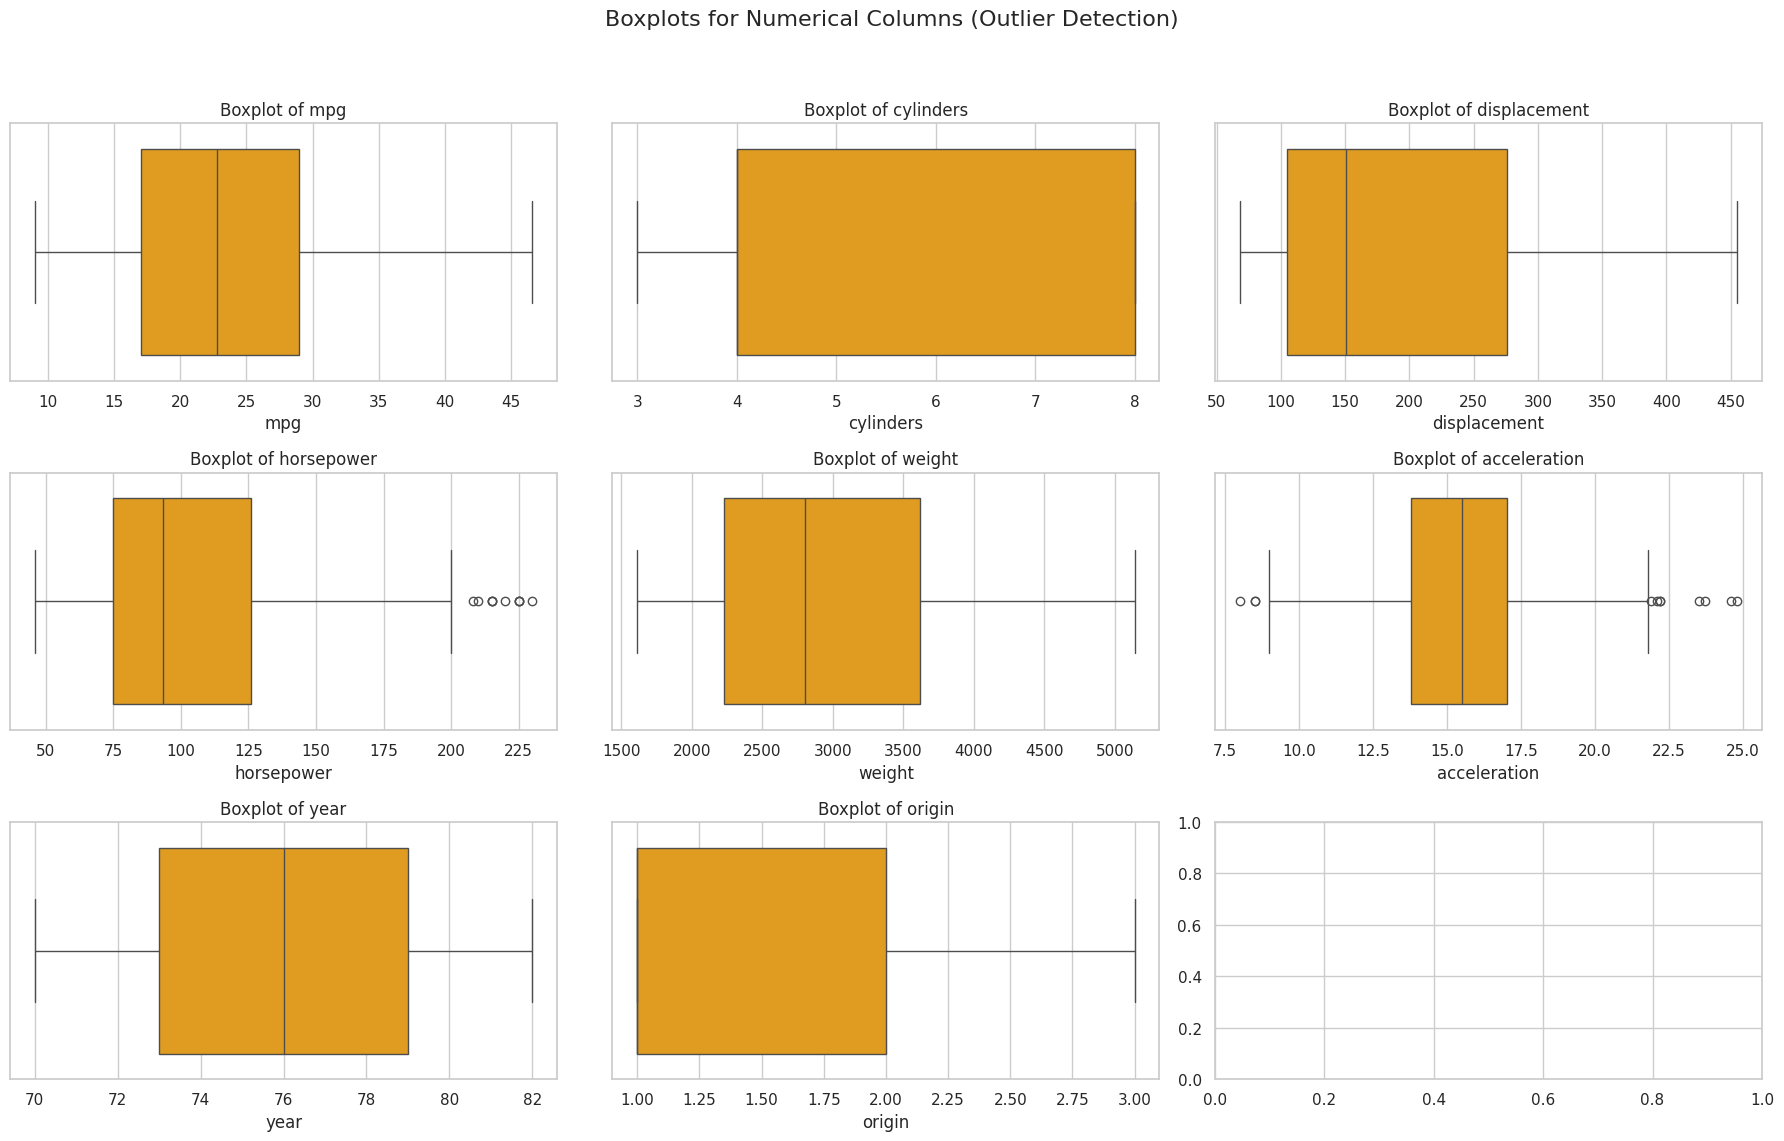

In [10]:
# Visualization: Boxplots to check for outliers
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Boxplots for Numerical Columns (Outlier Detection)", fontsize=16)

for col, subplot in zip(numerical_columns, ax.flatten()):
    sns.boxplot(x=data[col], color='orange', ax=subplot)
    subplot.set_title(f'Boxplot of {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-15-a3aa96529aae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=subplot, palette="viridis")


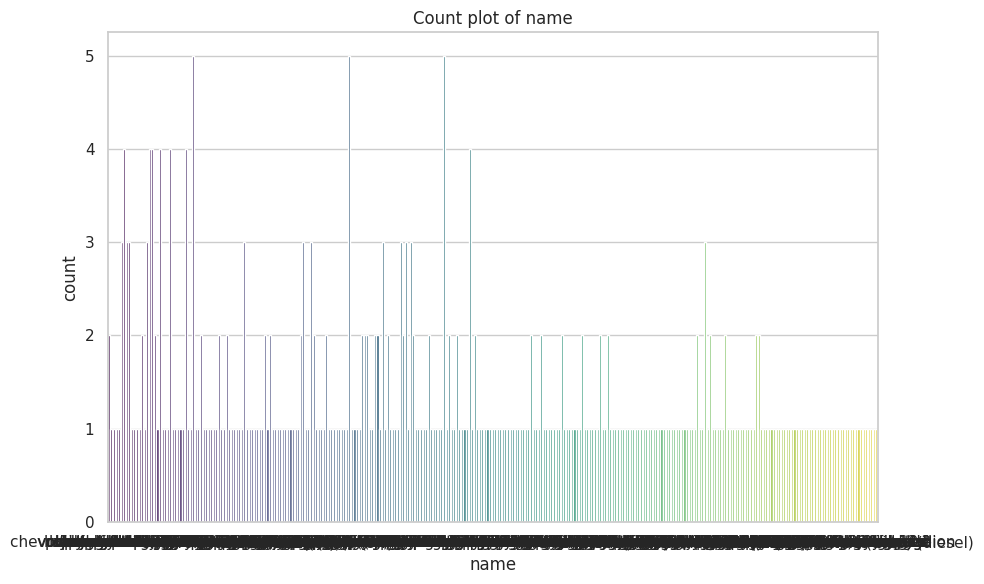

In [15]:
# Categorical variables: Count plots
categorical_columns = data.select_dtypes(include='object').columns
fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10, 6 * len(categorical_columns)))

# Check if ax is an array or a single Axes object
if len(categorical_columns) == 1:
    # If it's a single Axes, treat it as a list for consistency
    ax = [ax]

for col, subplot in zip(categorical_columns, ax):  # Remove flatten()
    sns.countplot(x=data[col], ax=subplot, palette="viridis")
    subplot.set_title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

# Bivariate analysis

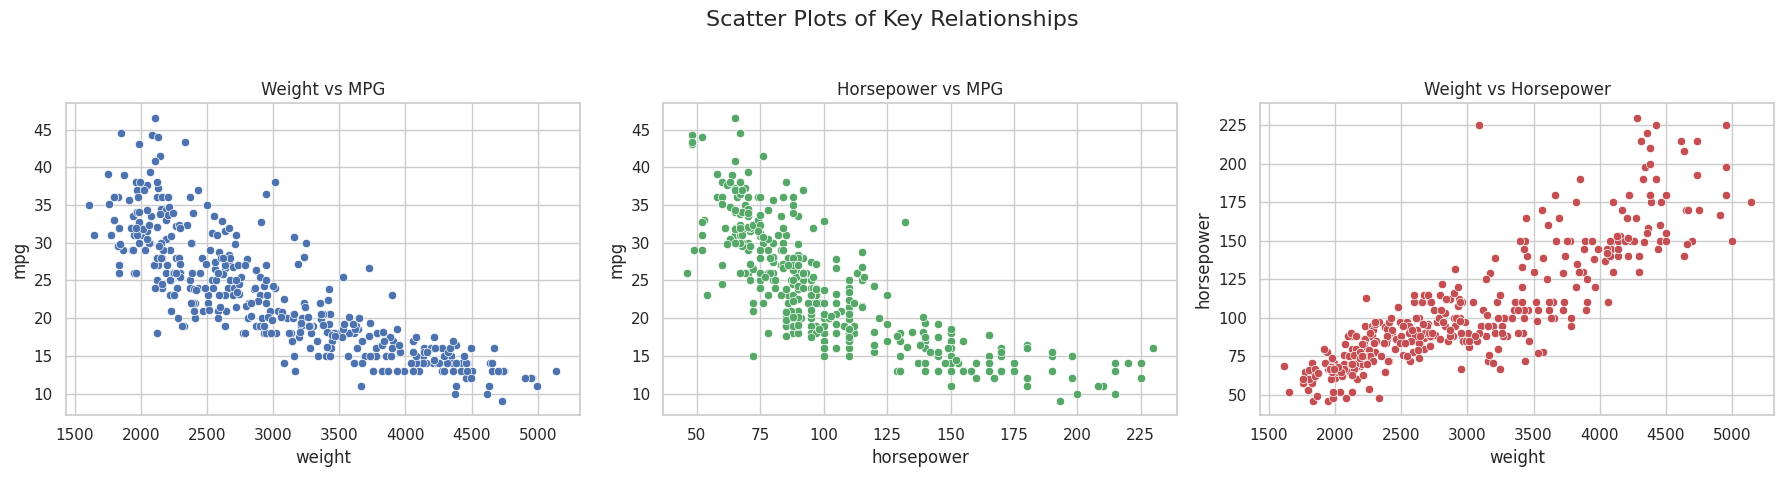

In [11]:
# Scatter plot for some key relationships
# mpg vs weight, mpg vs horsepower, weight vs horsepower
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Scatter Plots of Key Relationships", fontsize=16)

sns.scatterplot(x='weight', y='mpg', data=data, ax=ax[0], color='b')
ax[0].set_title('Weight vs MPG')

sns.scatterplot(x='horsepower', y='mpg', data=data, ax=ax[1], color='g')
ax[1].set_title('Horsepower vs MPG')

sns.scatterplot(x='weight', y='horsepower', data=data, ax=ax[2], color='r')
ax[2].set_title('Weight vs Horsepower')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
# Creating contingency tables for categorical data and numerical relationships

# 2-D Contingency table between 'origin' and 'cylinders'
origin_cylinder_contingency = pd.crosstab(data['origin'], data['cylinders'])

# Mean 'mpg' values grouped by 'cylinders' and 'origin'
mpg_by_cylinders_origin = data.pivot_table(values='mpg', index='origin', columns='cylinders', aggfunc='mean')

# n-D Analysis: Mean values for all numerical columns by 'origin' and 'cylinders'
numerical_by_origin_cylinders = data.groupby(['origin', 'cylinders']).mean(numeric_only=True)

origin_cylinder_contingency, mpg_by_cylinders_origin, numerical_by_origin_cylinders


(cylinders  3   4  5   6    8
 origin                      
 1          0  69  0  73  103
 2          0  61  3   4    0
 3          4  69  0   6    0,
 cylinders      3          4          5          6          8
 origin                                                      
 1            NaN  28.013043        NaN  19.645205  14.963107
 2            NaN  28.106557  27.366667  20.100000        NaN
 3          20.55  31.595652        NaN  23.883333        NaN,
                         mpg  displacement  horsepower       weight  \
 origin cylinders                                                     
 1      4          28.013043    124.050725   80.956522  2427.391304   
        6          19.645205    226.643836   99.671233  3218.547945   
        8          14.963107    345.009709  158.300971  4114.718447   
 2      4          28.106557    104.606557   78.311475  2338.295082   
        5          27.366667    145.000000   82.333333  3103.333333   
        6          20.100000    159.75000

<ipython-input-16-d6a14d926c05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=data, ax=ax[0], palette="pastel").set(title='MPG by Origin')
<ipython-input-16-d6a14d926c05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinders', y='mpg', data=data, ax=ax[1], palette="pastel").set(title='MPG by Cylinders')


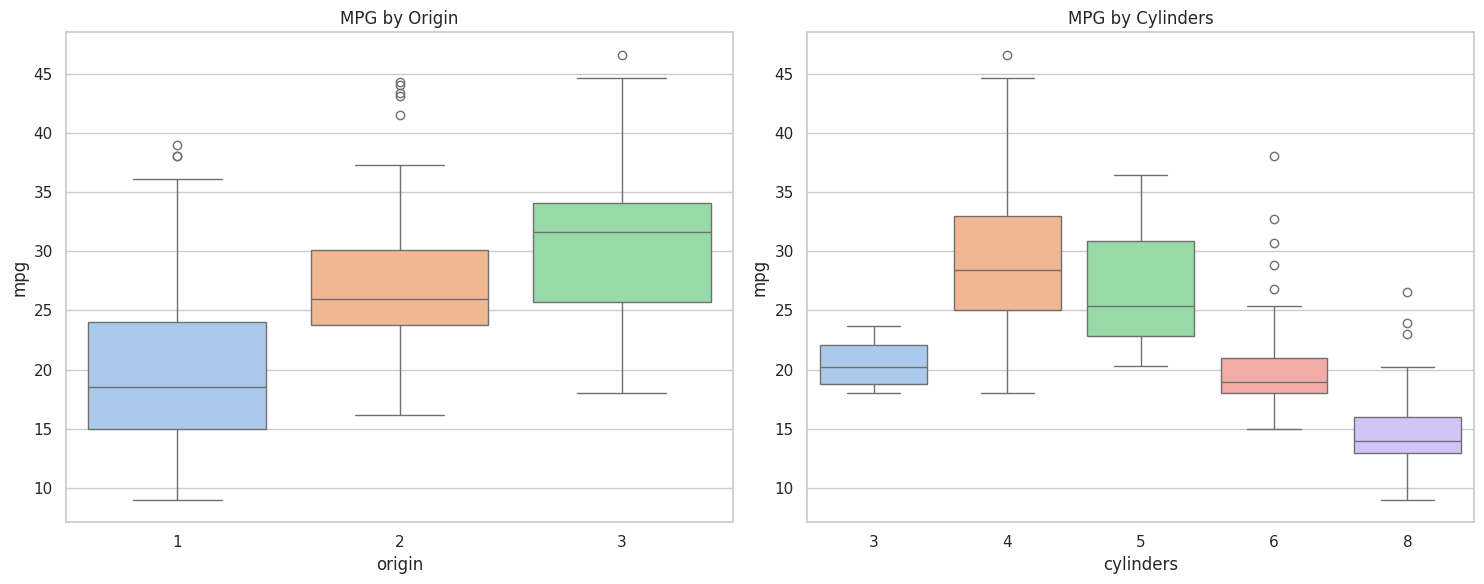

In [16]:
# Numerical vs. Categorical: Box plots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='origin', y='mpg', data=data, ax=ax[0], palette="pastel").set(title='MPG by Origin')
sns.boxplot(x='cylinders', y='mpg', data=data, ax=ax[1], palette="pastel").set(title='MPG by Cylinders')
plt.tight_layout()
plt.show()

Box Plot for Each Numerical Column Against Categorical Columns

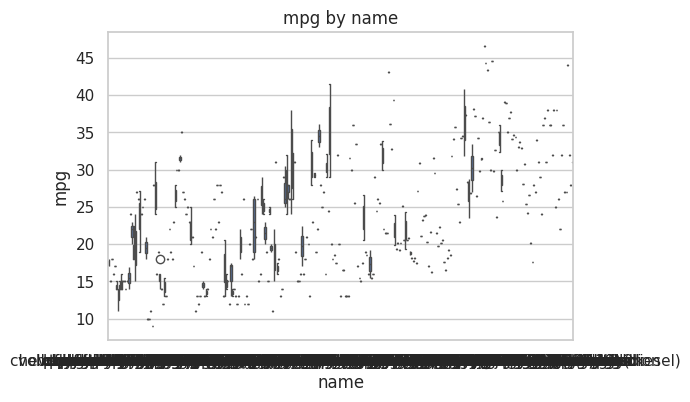

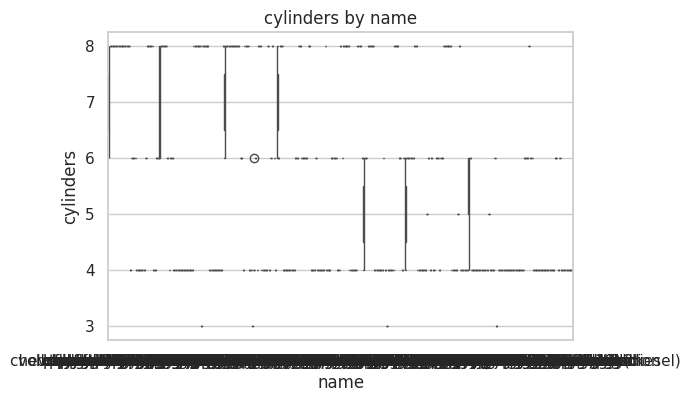

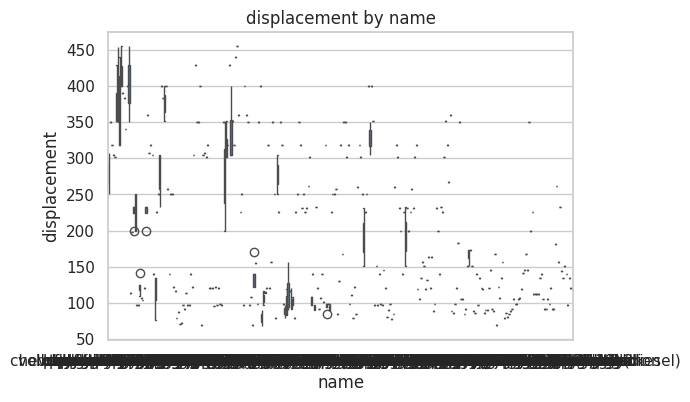

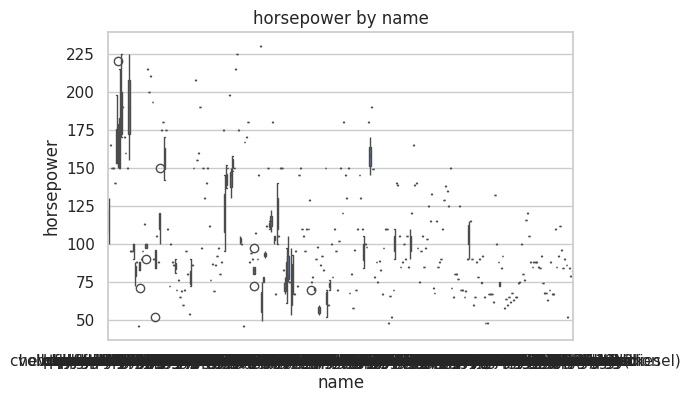

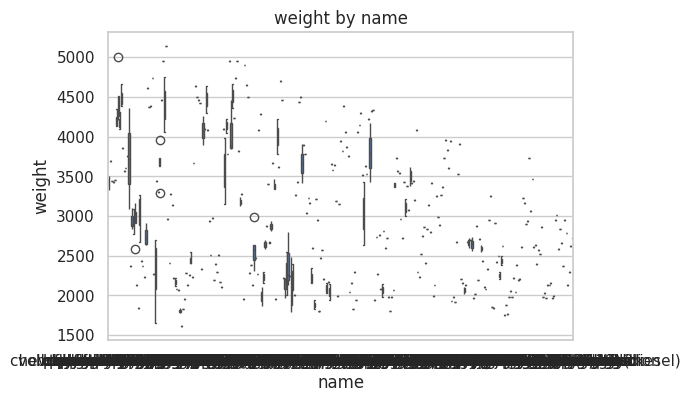

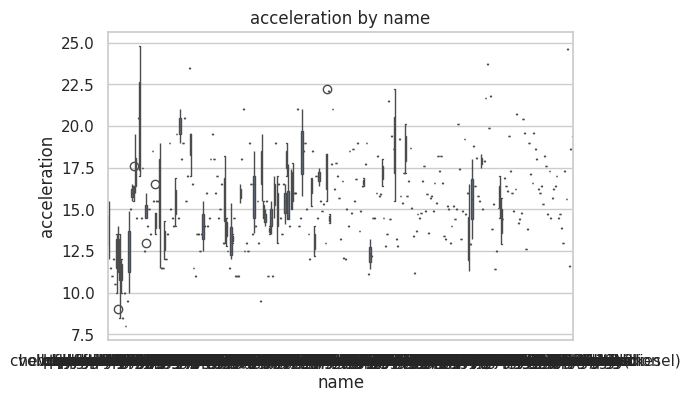

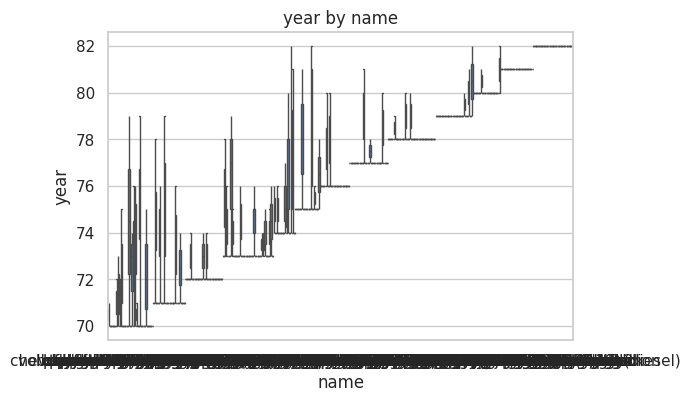

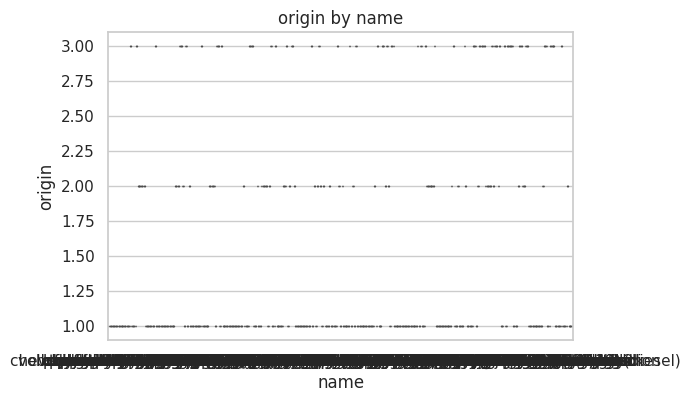

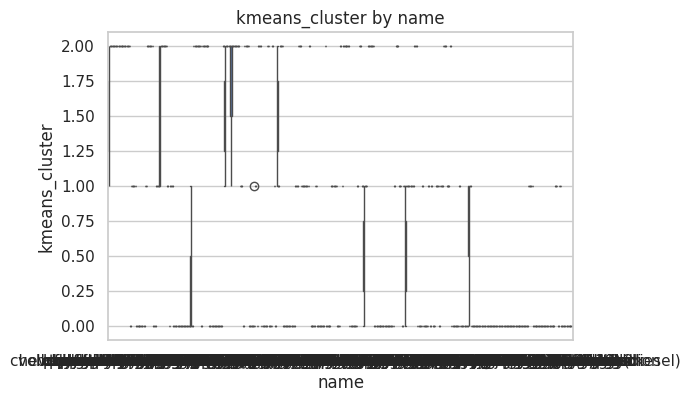

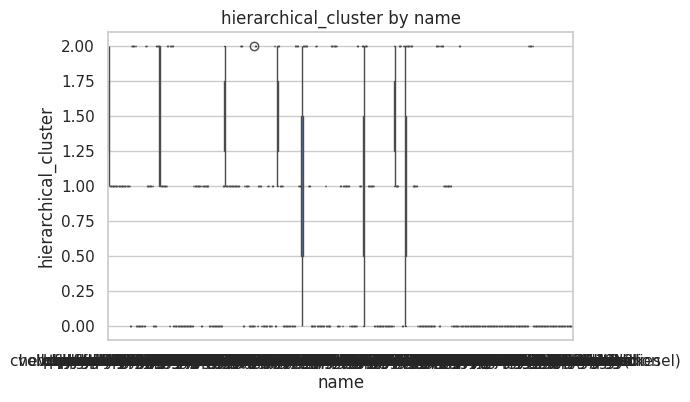

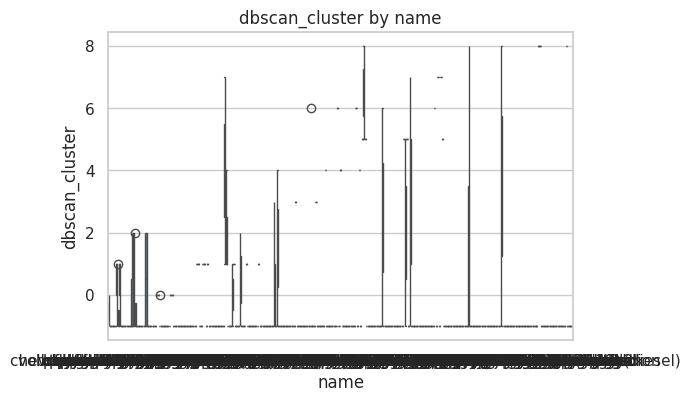

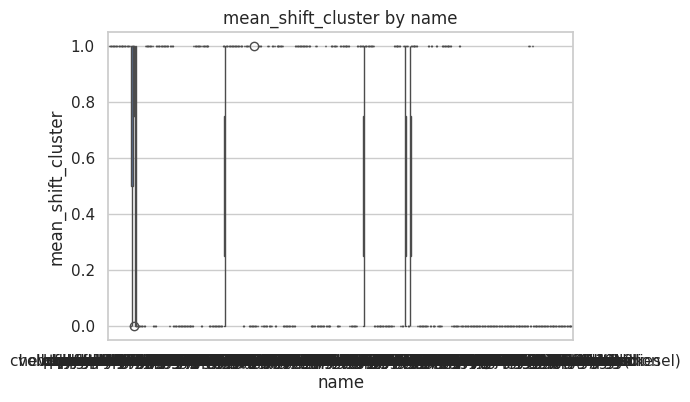

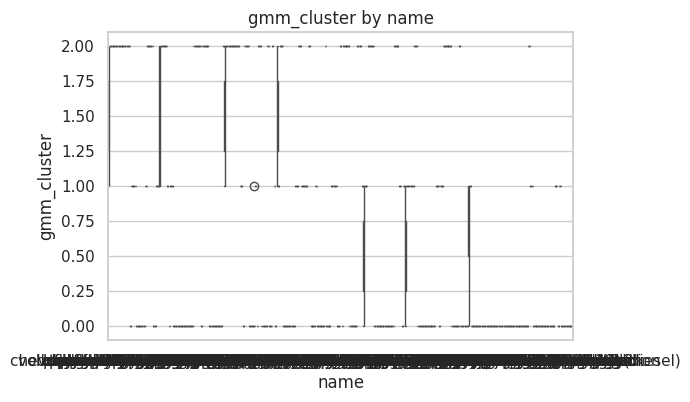

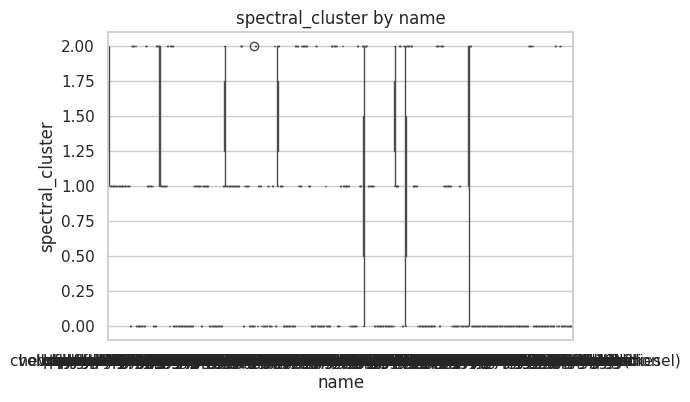

In [43]:
# Numerical vs. Categorical: Box plots
cat_columns = data.select_dtypes(include='object').columns
# Get numerical columns:
num_columns = data.select_dtypes(include=['number']).columns # Added this line to define num_columns

for cat_col in cat_columns:
    for num_col in num_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat_col, y=num_col, data=data)
        plt.title(f'{num_col} by {cat_col}')
        plt.show()


In [17]:
# Categorical vs. Categorical: Contingency table
origin_cylinder_contingency = pd.crosstab(data['origin'], data['cylinders'])
print("\nContingency Table (Origin vs Cylinders):\n", origin_cylinder_contingency)


Contingency Table (Origin vs Cylinders):
 cylinders  3   4  5   6    8
origin                      
1          0  69  0  73  103
2          0  61  3   4    0
3          4  69  0   6    0


# Multivariate Analysis

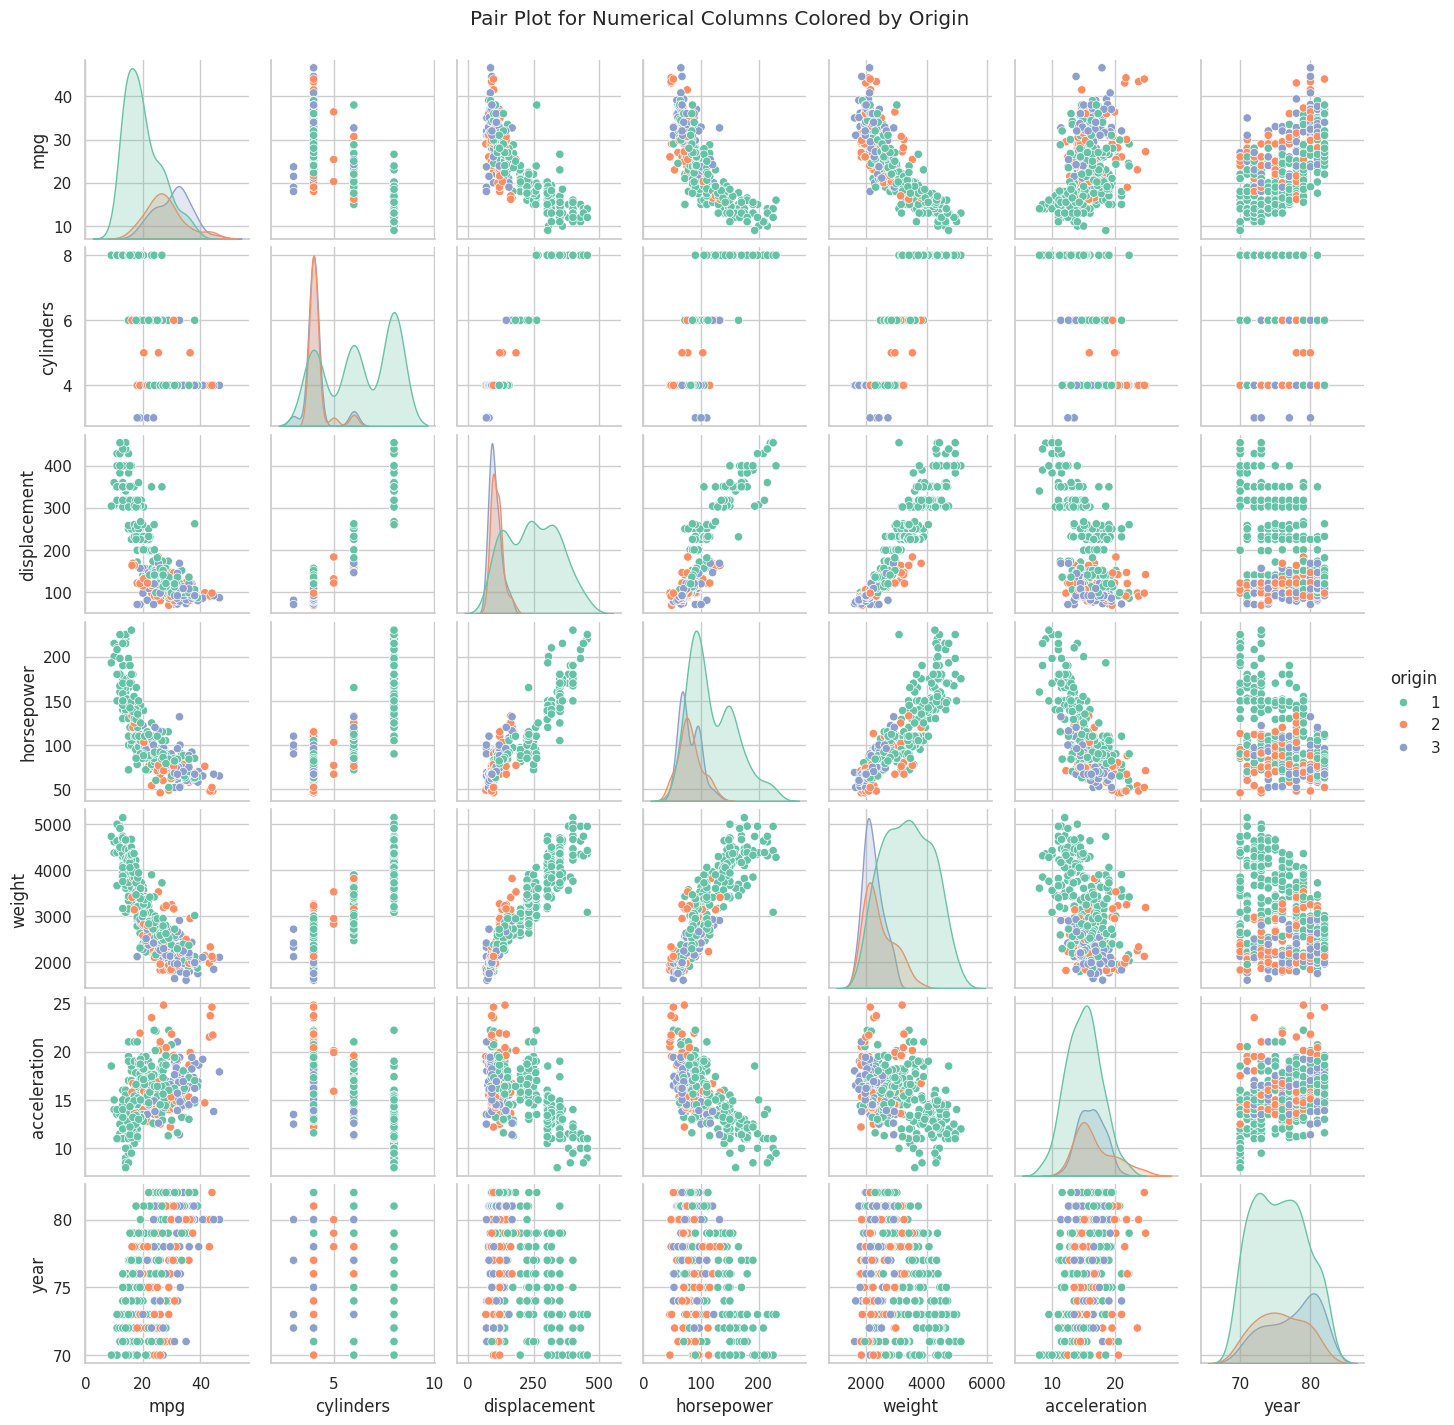

In [19]:
# Pair plot for numerical variables to visualize relationships
sns.pairplot(data[numerical_columns], hue='origin', palette="Set2", diag_kind='kde', height=2)
plt.suptitle("Pair Plot for Numerical Columns Colored by Origin", y=1.02)
plt.show()

In [20]:
# Grouped summary statistics for 'mpg' by 'origin' and 'cylinders'
mpg_by_origin_cylinders = data.groupby(['origin', 'cylinders'])['mpg'].mean().unstack()
print("\nMean MPG by Origin and Cylinders:\n", mpg_by_origin_cylinders)



Mean MPG by Origin and Cylinders:
 cylinders      3          4          5          6          8
origin                                                      
1            NaN  28.013043        NaN  19.645205  14.963107
2            NaN  28.106557  27.366667  20.100000        NaN
3          20.55  31.595652        NaN  23.883333        NaN


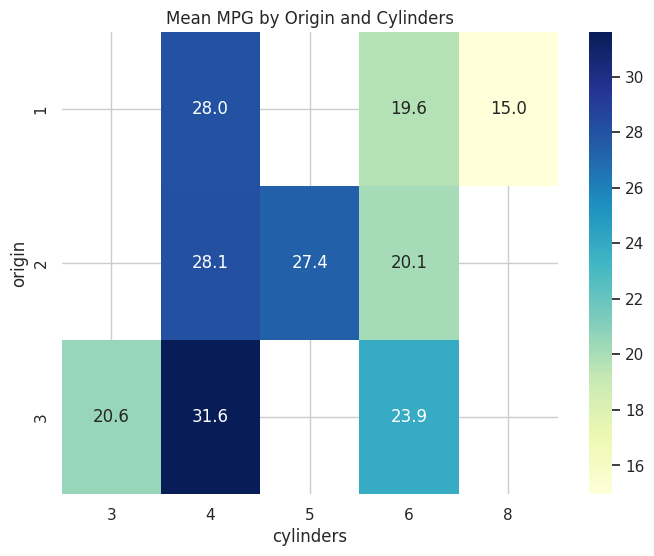

In [21]:
# Heatmap to visualize mean mpg values across 'origin' and 'cylinders'
plt.figure(figsize=(8, 6))
sns.heatmap(mpg_by_origin_cylinders, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Mean MPG by Origin and Cylinders")
plt.show()

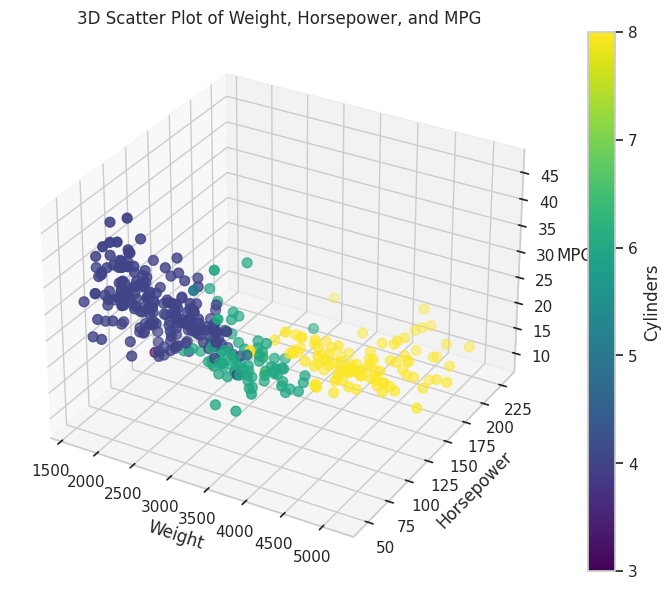

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['weight'], data['horsepower'], data['mpg'],
                     c=data['cylinders'], cmap="viridis", s=50)
ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
fig.colorbar(scatter, ax=ax, label='Cylinders')
plt.title("3D Scatter Plot of Weight, Horsepower, and MPG")
plt.show()


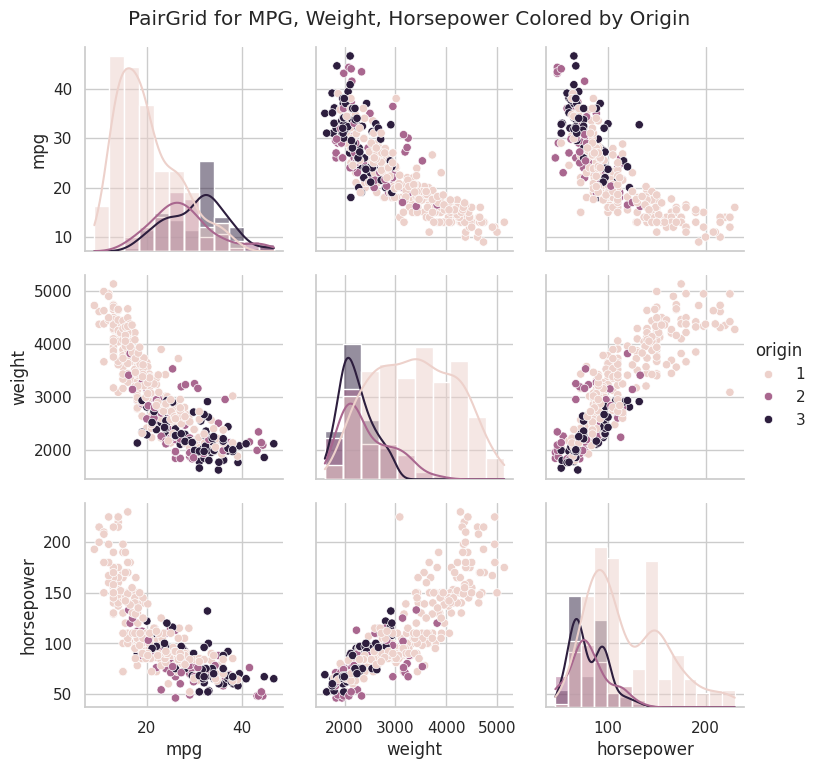

In [25]:
# Multivariate Scatter Plot with PairGrid
g = sns.PairGrid(data, vars=['mpg', 'weight', 'horsepower'], hue='origin')
g = g.map_diag(sns.histplot, kde=True)
g = g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle("PairGrid for MPG, Weight, Horsepower Colored by Origin", y=1.02)
plt.show()


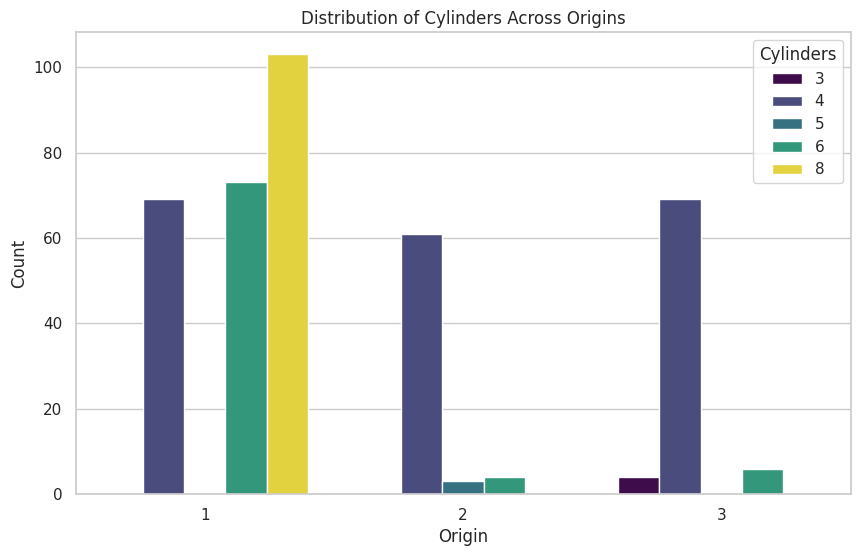

In [26]:
# Clustered Bar Plot for Origin and Cylinders
plt.figure(figsize=(10, 6))
sns.countplot(x='origin', hue='cylinders', data=data, palette="viridis")
plt.title("Distribution of Cylinders Across Origins")
plt.xlabel("Origin")
plt.ylabel("Count")
plt.legend(title='Cylinders')
plt.show()


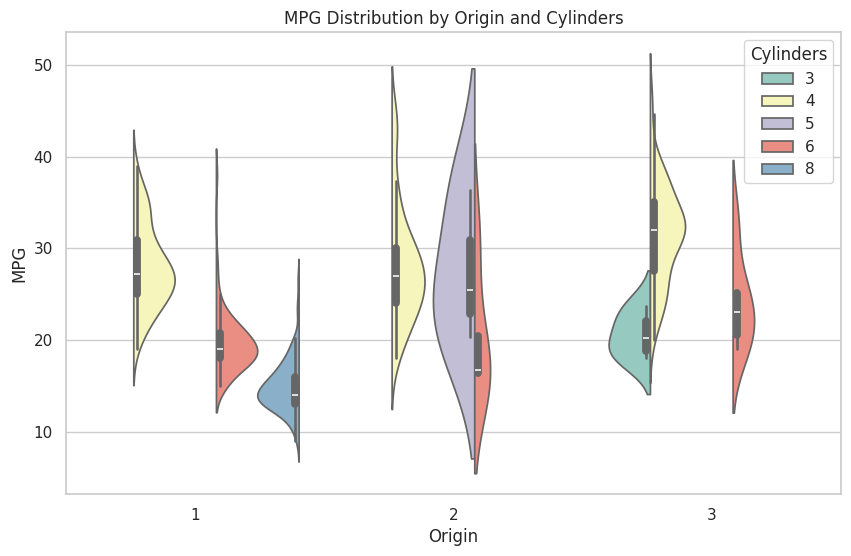

In [27]:
# Violin Plot for MPG by Origin and Cylinders
plt.figure(figsize=(10, 6))
sns.violinplot(x='origin', y='mpg', hue='cylinders', data=data, split=True, palette="Set3")
plt.title("MPG Distribution by Origin and Cylinders")
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.legend(title='Cylinders')
plt.show()


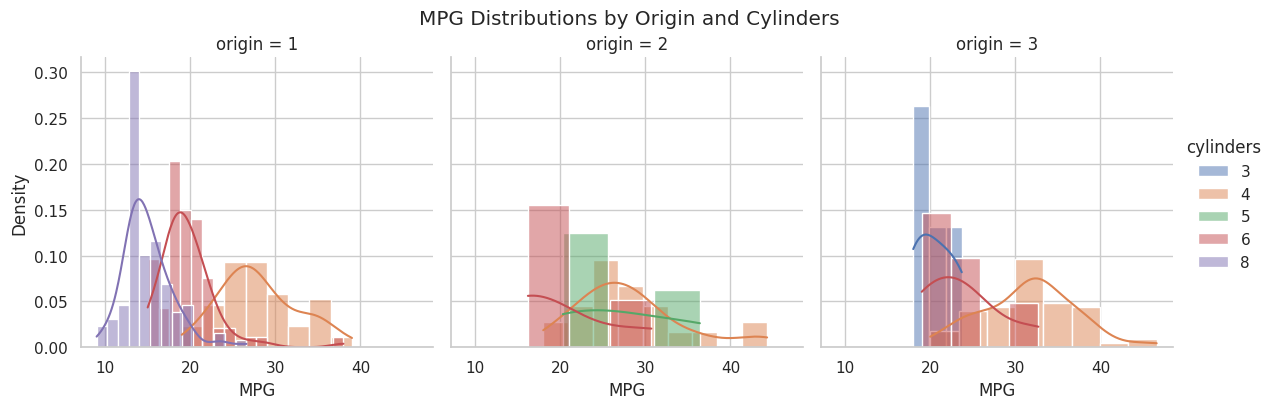

In [28]:
# Facet Grid for MPG Distributions by Origin and Cylinders
g = sns.FacetGrid(data, col="origin", hue="cylinders", height=4, aspect=1)
g.map(sns.histplot, "mpg", kde=True, stat="density", common_norm=False)
g.add_legend()
g.set_axis_labels("MPG", "Density")
plt.suptitle("MPG Distributions by Origin and Cylinders", y=1.02)
plt.show()


# PCA

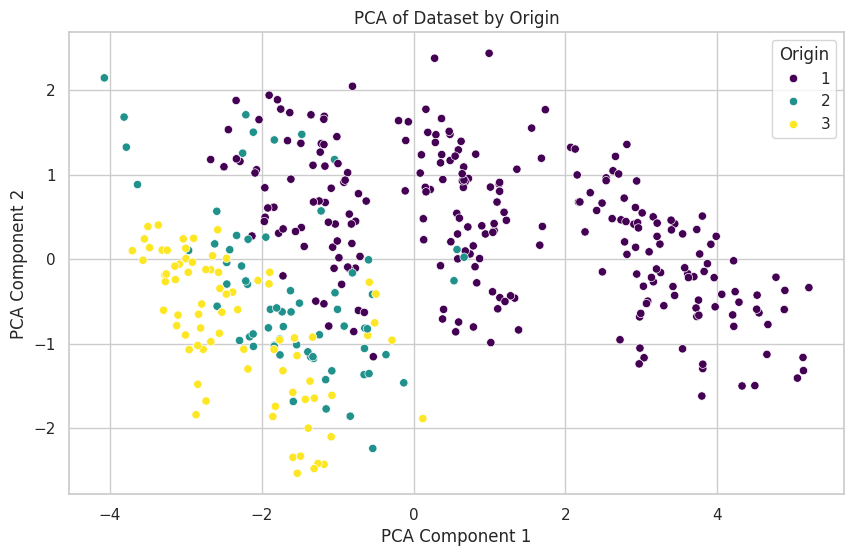

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['origin'], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Dataset by Origin")
plt.legend(title='Origin')
plt.show()


 Regression Analysis for All Combinations

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choose your two numerical columns
predictor_column = 'horsepower'  # Replace with the name of your predictor column
target_column = 'mpg'  # Replace with the name of your target column

# Create feature (X) and target (y) data
X = data[[predictor_column]]  # Use double brackets to select as a DataFrame
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr.predict(X_test)
print(f'MSE for {target_column} prediction using {predictor_column}:', mean_squared_error(y_test, y_pred))

MSE for mpg prediction using horsepower: 22.02638730697977


# Clustering

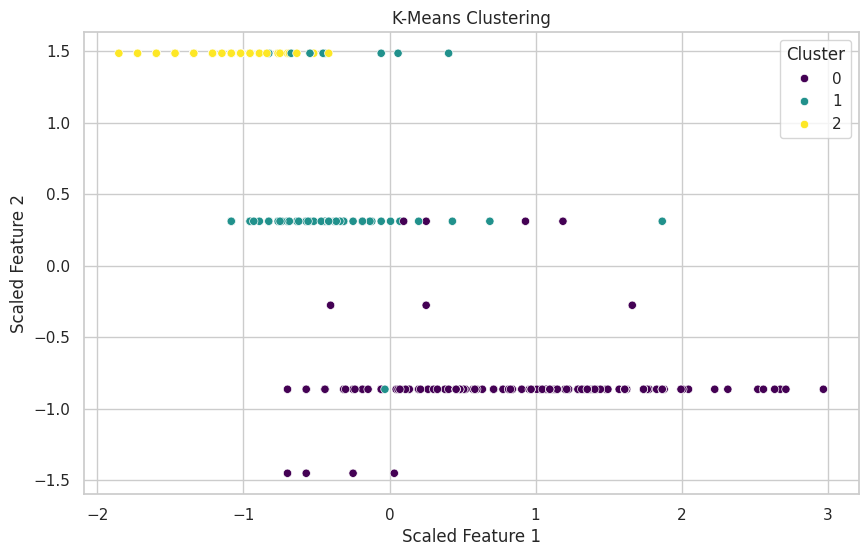

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Plotting K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['kmeans_cluster'], palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title="Cluster")
plt.show()


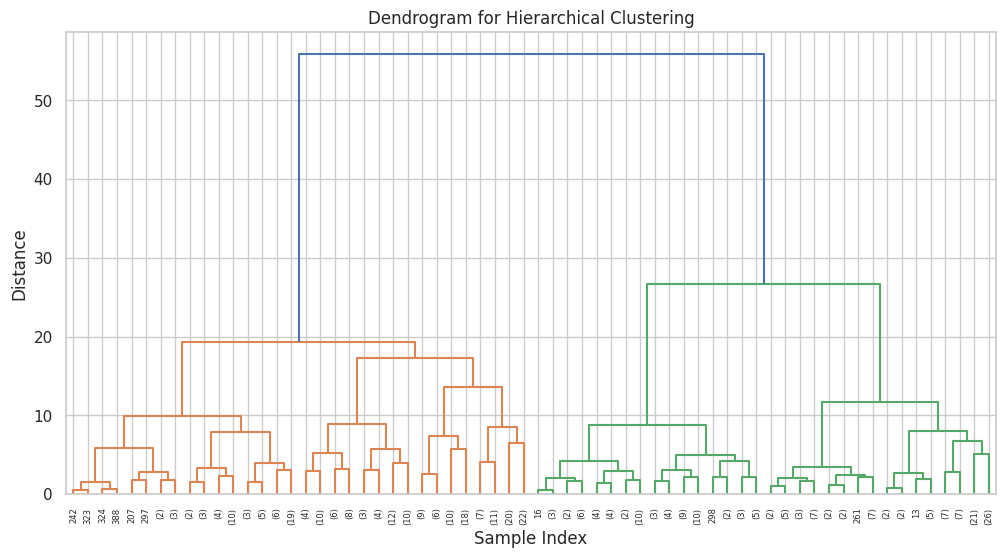

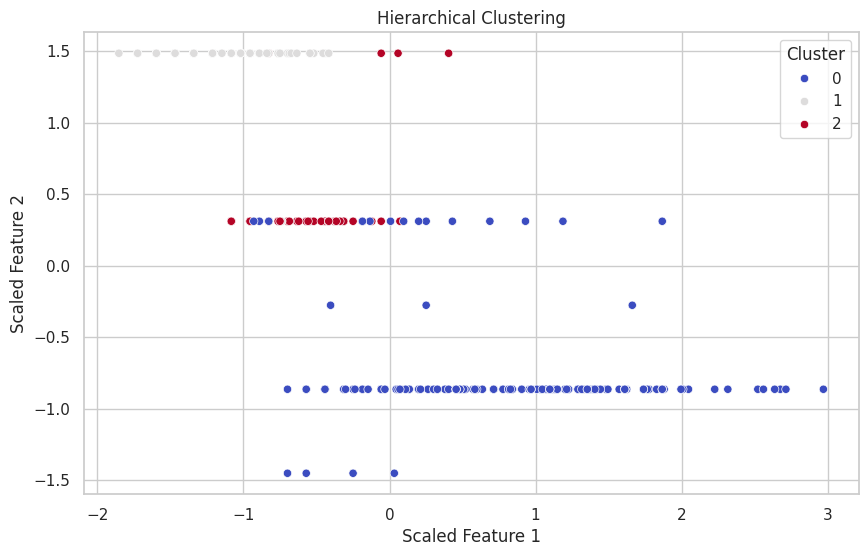

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering with dendrogram
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
data['hierarchical_cluster'] = agglo.fit_predict(scaled_data)

# Plotting Agglomerative clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['hierarchical_cluster'], palette="coolwarm")
plt.title("Hierarchical Clustering")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title="Cluster")
plt.show()


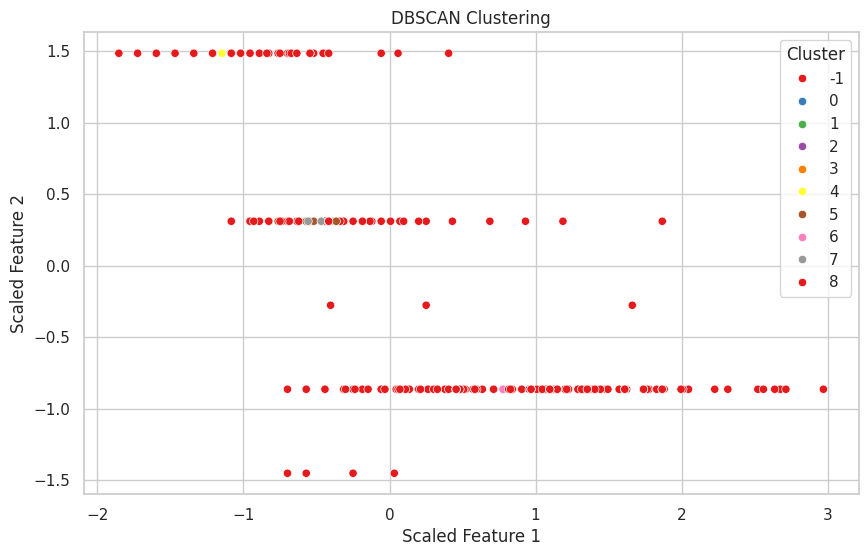

In [33]:

from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Plotting DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['dbscan_cluster'], palette="Set1")
plt.title("DBSCAN Clustering")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title="Cluster")
plt.show()


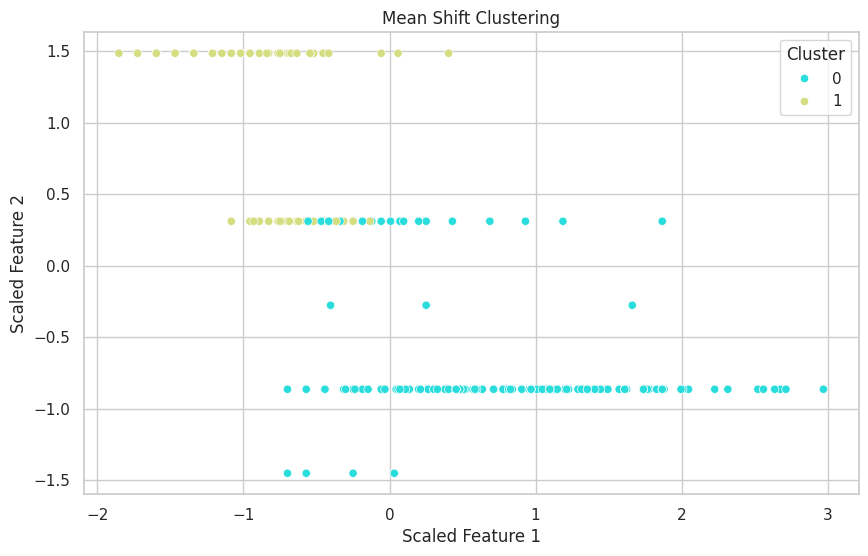

In [34]:
from sklearn.cluster import MeanShift

# Applying Mean Shift clustering
mean_shift = MeanShift()
data['mean_shift_cluster'] = mean_shift.fit_predict(scaled_data)

# Plotting Mean Shift clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['mean_shift_cluster'], palette="rainbow")
plt.title("Mean Shift Clustering")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title="Cluster")
plt.show()


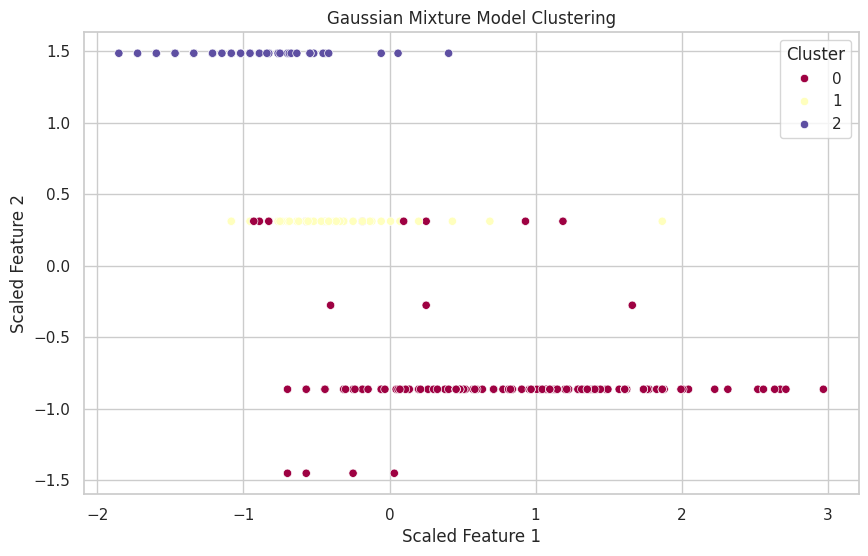

In [35]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(scaled_data)

# Plotting GMM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['gmm_cluster'], palette="Spectral")
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title="Cluster")
plt.show()


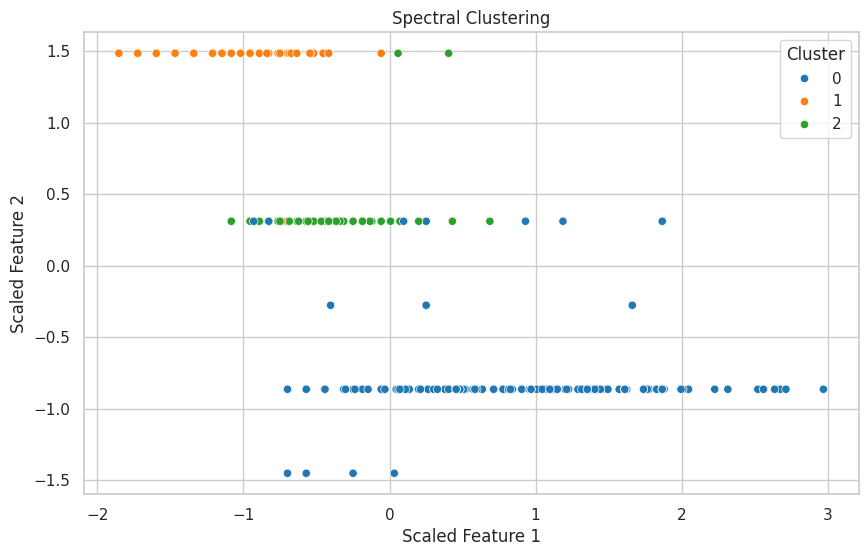

In [36]:
from sklearn.cluster import SpectralClustering

# Applying Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['spectral_cluster'] = spectral.fit_predict(scaled_data)

# Plotting Spectral clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['spectral_cluster'], palette="tab10")
plt.title("Spectral Clustering")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title="Cluster")
plt.show()


Summary of Clustering Techniques:
K-Means Clustering: Fast and interpretable but assumes spherical clusters.
Hierarchical Clustering: Provides a dendrogram but less scalable for large datasets.
DBSCAN: Detects noise and handles clusters of varying shapes but needs tuning of parameters.
Mean Shift: Identifies cluster count automatically but can be computationally intensive.
Gaussian Mixture Model (GMM): Probabilistic approach, flexible in handling different shapes.
Spectral Clustering: Effective for complex structures but can be slow for large datasets.